<a href="https://colab.research.google.com/github/renanreyc/IA-UEPB/blob/main/Estudo_de_caso_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "000080">1. Estudo de Caso: Classificação de dígitos com *k-Nearest Neighbors*</font>

Vamos começar trabalhando com problemas de **classificação** com algoritmos de aprendizado supervisionado.

Utilizamos aqui o conjunto de dados `Digits`$^{1}$ do `scikit-learn`, que consiste de imagens de 8x8 pixels representando 1797 dígitos manuscritos (0 a 9).

O objetivo deste problema de multiclassificação é predizer qual dígito a imagem representa. Temos um modelo de classificação usando dados rotulados - sabemos com antecedência a classe de cada dígito.

Neste estudo de caso, usaremos um dos algoritmos de classificação de aprendizado de máquina mais simples, k-vizinhos mais próximos (k-NN), para reconhecer dígitos manuscritos.

$^{1}$<a href="https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset">Conjunto de dados</a>

### <font color = "000080">Abordagem utilizada</font>

Abordaremos este estudo de caso em duas seções. Nesta seção, começaremos com as etapas básicas de um estudo de caso de aprendizado de máquina:

- Decida os dados a partir dos quais treinar um modelo.
- Carregue e explore os dados.
- Divida os dados para treinamento e teste.
- Selecione e construa o modelo.
- Treine o modelo.
- Fazer previsões.

Na próxima seção, veremos:

- Avalie os resultados.
- Ajuste o modelo.
- Execute vários modelos de classificação para escolher o melhor.

### <font color = "000080">Problemas de classificação</font>

Vamos trabalhar com classificação em aprendizado de máquina supervisionado, que tenta prever classes distintas à qual uma amostra pertence. 

Por exemplo, se você tiver imagens de cães e imagens de gatos, pode classificar cada imagem como um “cachorro” ou um “gato”. Este é um problema de classificação binária porque existem duas classes.

Usaremos o conjunto de dados `Digits` junto com o `scikit-learn`, que consiste em imagens de 8 por 8 pixels que representam 1.797 dígitos manuscritos (0 a 9). 

Nosso objetivo é prever qual dígito uma imagem representa. Como existem 10 dígitos possíveis (as classes), esse é um problema de multiclassificação. 

Você treina um modelo de classificação usando dados rotulados - sabemos com antecedência a classe de cada dígito. Neste estudo de caso, usaremos um dos algoritmos de classificação de aprendizado de máquina mais simples, k-vizinhos mais próximos (k-NN), para reconhecer dígitos escritos à mão.

## <font color = "000080">1.2 *k-Nearest Neighbors Algorithm*</font>
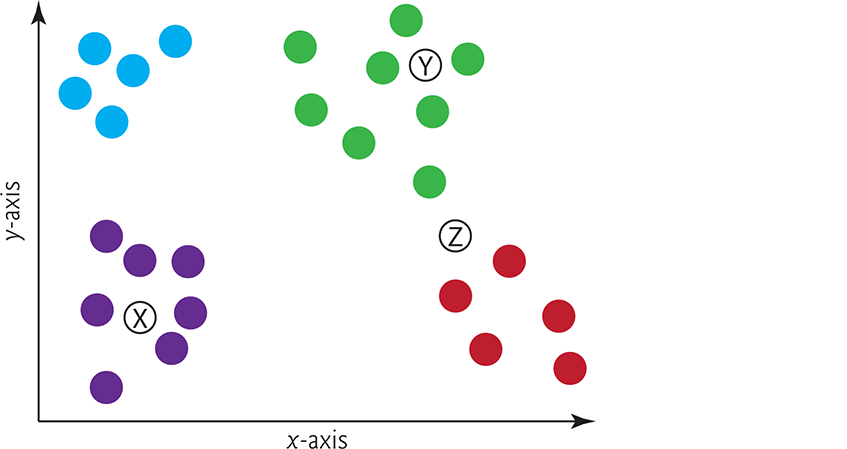

Considere o diagrama acima, no qual os círculos azuis, roxos, verdes e vermelhos representam quatro classes da amostra. Para esta discussão, usaremos os nomes das cores como os nomes das classes.

Queremos prever as classes às quais pertencem as novas amostras X, Y e Z. Vamos supor que gostaríamos de fazer essas previsões usando os três vizinhos mais próximos de cada amostra - três é k no algoritmo de k-vizinhos mais próximos:

- Os três vizinhos mais próximos da amostra de X são todos pontos roxos, então a predição é que a classe de X é roxa.
- Os três vizinhos mais próximos da amostra de Y são todos pontos verdes, portanto, a predição é que a classe de Y é verde.
- Para Z, a escolha não é tão clara, porque aparece entre os pontos verdes e vermelhos. Dos três vizinhos mais próximos, um é verde e dois são vermelhos. No algoritmo de k-vizinhos mais próximos, a classe com mais “votos” vence. Então, com base em dois votos vermelhos para um voto verde, a predição é que a classe de Z é vermelha. 

Escolher um valor k ímpar no algoritmo kNN evita empates, garantindo que nunca haja um número igual de votos.

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** A classificação `________` divide as amostras em duas classes distintas e a classificação `________` divide as amostras em várias classes distintas.

<font color = "808080">R.: Binário, multiclassificação </font>

### <font color = "000080">Hiperparâmetros e ajuste de hiperparâmetros</font>

No aprendizado de máquina, um **modelo** implementa um algoritmo de aprendizado de máquina. No `scikit-learn`, os modelos são chamados de **estimadores**. 

Existem dois tipos de parâmetros no aprendizado de máquina:
- aqueles que o estimador calcula à medida que aprende com os dados que você fornece;
- aqueles que você especifica com antecedência ao criar o objeto estimador `scikit-learn` que representa o modelo.

Os parâmetros especificados antecipadamente são chamados de **hiperparâmetros**. No algoritmo KNN, k é um hiperparâmetro. Para simplificar, vamos usar valores de hiperparâmetros padrão do `scikit-learn`. Em estudos de aprendizado de máquina do mundo real, você desejará experimentar diferentes valores de k para produzir os melhores modelos possíveis para seus estudos. Esse processo é chamado de ajuste de hiperparâmetros. 

Posteriormente, usaremos o ajuste de hiperparâmetros para escolher o valor de k que permite ao algoritmo de k-vizinhos mais próximos fazer as melhores previsões para o conjunto de dados `Digits`. O `scikit-learn` também possui recursos de ajuste de hiperparâmetros automatizados que você explorará nos exercícios.

## <font color = "000080">Autoavaliação</font>
**1. _(V ou F)_** No aprendizado de máquina, um modelo implementa um algoritmo de aprendizado de máquina. No `scikit-learn`, os modelos são chamados de estimadores.


**2. _(Preencha)_** O processo de escolha do melhor valor de * k * para o algoritmo k-vizinhos mais próximos é chamado de `________`

<font color = "808080">R.: 1.V; 2. Ajuste de hiperparâmetros</font>

## <font color = "000080">1.2 Carregando o conjunto de dados</font>

**Adicionar `%matplotlib inline` para permitir uso de Matplotlib neste *notebook*.**

In [149]:
%matplotlib inline
from sklearn.datasets import load_digits

In [150]:
digitos = load_digits()

### <font color = "000080">Descrevendo os dados</font>

O conjunto de dados utilizado é um subconjunto de <a href="http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits">*UCI (University of California Irvine) ML hand-written digits dataset*</a>. Os dados originais contém 5620 amostras (3823 para treinamento e 1797 para teste).
Nossa versão contém apenas as amostras de teste.

In [151]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

De acordo com a descrição do conjunto de dados `Digits`, cada amostra tem 64 atributos que representam uma imagem 8 por 8 com valores de pixel no intervalo de 0 a 16.

Este conjunto de dados não possui valores ausentes. Os 64 atributos podem parecer muito, mas os conjuntos de dados do mundo real às vezes podem ter centenas, milhares ou até milhões de recursos.

### <font color = "000080">Checando as amostras e objetivos</font>

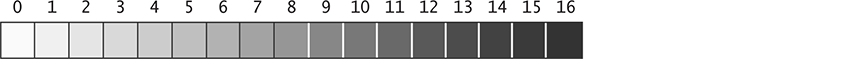

In [152]:
digitos.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [153]:
digitos.data.shape

(1797, 64)

In [154]:
digitos.target.shape

(1797,)

### <font color = "000080">Uma imagem da amostra</font>
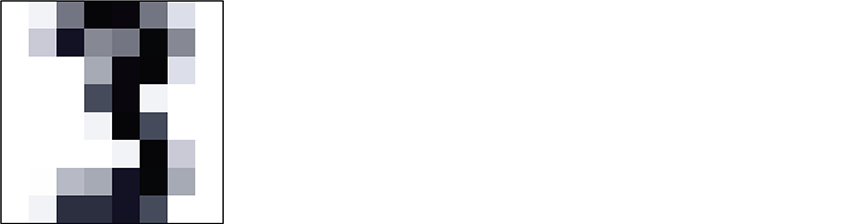

In [155]:
digitos.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

### <font color = "000080">Preparando os dados para uso com *Scikit-Learn*</font>

In [156]:
digitos.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Os atributos `________` e `________` do objeto `Bunch` são *arrays NumPy* que contêm as amostras e os rótulos do conjunto de dados, respectivamente.

**2. _(V ou F)_** Um objeto `Bunch` do `scikit-lean` contém apenas os dados de um conjunto de dados.

**3. _(IPython)_** Para o número de amostra `22` no conjunto de dados `Digits` exiba os dados da imagem 8 por 8 e o valor numérico do dígito que a imagem representa.

<font color = "808080">R.: 1. data e target; 2. Falso</font>

In [157]:
# 3:
digitos.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [158]:
#3
digitos.target[22]

2

## <font color = "000080">1.3 Visualizando os dados</font>

In [159]:
import matplotlib.pyplot as plt

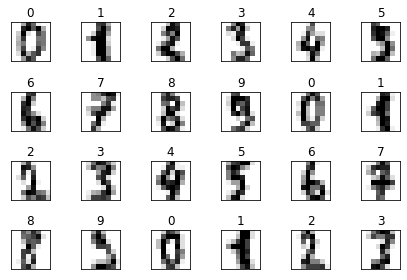

In [160]:
figura, eixos = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(eixos.ravel(), digitos.images, digitos.target):
    eixos, imagem, target = item
    eixos.imshow(imagem, cmap=plt.cm.gray_r)
    eixos.set_xticks([])
    eixos.set_yticks([])
    eixos.set_title(target)
plt.tight_layout()


## <font color = "000080">Autoavaliação</font>


**1. _(Preencha)_** O processo de familiarização com seus dados é chamado `________`.


**2. _(IPython)_** Exibir a imagem do número de amostra `22` do conjunto de dados `Digits`. 

<font color = "808080">R.: Análise exploratória </font>

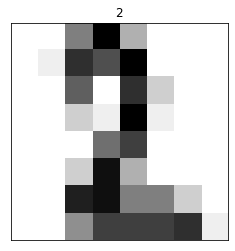

In [161]:
# 2:
eixos2 = plt.subplot()
imagem2 = plt.imshow(digitos.images[22], cmap=plt.cm.gray_r)
xticks = eixos2.set_xticks([])
yticks = eixos2.set_yticks([])
title = eixos2.set_title(digitos.target[22])


## <font color = "000080">1.4 Dividindo os dados</font>

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    digitos.data,
    digitos.target,
    random_state=11)

### <font color = "000080">Tamanho do conjunto de dados</font>

In [164]:
X_treino.shape

(1347, 64)

In [165]:
X_teste.shape

(450, 64)

## <font color = "000080">Autoavaliação</font>

**1. _(V ou F)_** Você normalmente deve usar todos os dados de um conjunto de dados para treinar um modelo.

**2. _(Discusão)_** Para o conjunto de dados `Digits`, que número de amostras a seguinte declaração reservaria para fins de treinamento e teste? 

```python
X_treino, X_teste, y_treino, y_teste = train_test_split(
    digitos.data, digitos.target, test_size=0.40)
```

<font color = "808080">R.:</font>

In [166]:
# Resposta 2
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(digitos.data, digitos.target, test_size=0.40)

In [167]:
# Resposta 2
X_treino2.shape

(1078, 64)

In [168]:
# Resposta 2
X_teste2.shape


(719, 64)

<font color = "808080">R2.: 1078 e 719</font>

## <font color = "000080">1.5 Criando o modelo</font>

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
knn = KNeighborsClassifier()

## <font color = "000080">1.6 Treinando o modelo</font>

In [171]:
knn.fit(X=X_treino, y=y_treino)

KNeighborsClassifier()

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Diz-se que o `KNeighborsClassifier` é` ________ `porque seu trabalho é realizado apenas quando você o utiliza para fazer previsões.

**2. _(V ou F)_** O método `fit` de cada estimador/modelo do `scikit-learn` simplesmente carrega um conjunto de dados.

<font color = "808080">R.: Lazy/preguiçoso; 2. Falso </font>

## <font color = "000080">1.7 Predizendo as classes</font>

In [172]:
previsao = knn.predict(X=X_teste)

In [173]:
desejado = y_teste

In [174]:
previsao[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [175]:
desejado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [176]:
erros = [(p, d) for (p, d) in zip(previsao, desejado) if p != d]

In [177]:
erros

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## <font color = "000080">Autoavaliação</font>

**1. _(IPython)_** Usando os *arrays* `desejado` e `erros`, calcule e exiba a porcentagem de precisão da previsão.

In [178]:
# código
print(f'{((len(desejado) - len(erros)) / len(desejado)) * 100:.2f}')

97.78


**2. _(IPython)_** Reescreva a compreensão da lista no cálculo dos erros (aqui na saída `[24]`) usando uma instrução `for`. Qual estilo de codificação você prefere?

In [179]:
erros_new = []

In [180]:
for p, d in zip(previsao, desejado):
    if p != d:
        erros_new.append((p, d))

In [181]:
erros_new

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## <font color = "000080">1.8 Métricas</font>

In [182]:
print(f'{knn.score(X_teste, y_teste):.2%}')

97.78%


### <font color = "000080">Matriz de confusão</font>

In [183]:
from sklearn.metrics import confusion_matrix

In [184]:
confusao = confusion_matrix(y_true=desejado, y_pred=previsao)

In [185]:
confusao

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

### <font color = "000080">Métricas de classificação</font>

In [186]:
from sklearn.metrics import classification_report

In [187]:
nomes = [str(digito) for digito in digitos.target_names]

In [188]:
print(classification_report(desejado, previsao, target_names=nomes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Do resultado anterior:

- *precision* é o número total de previsões corretas para um determinado dígito dividido pelo número total de previsões para aquele dígito. Você pode confirmar a precisão observando cada coluna na matriz de confusão. Por exemplo, se você olhar para o índice de coluna 7, verá 1s nas linhas 3 e 4, indicando que um 3 e um 4 foram classificados incorretamente como 7s e um 45 na linha 7, indicando que as 45 imagens foram classificadas corretamente como 7. Portanto, a precisão do dígito 7 é 45/47 ou 0,96.
- *recall* é o número total de previsões corretas para um dado dígito dividido pelo número total de amostras que deveriam ter sido previstas como aquele dígito. Você pode confirmar o *recall* observando cada linha na matriz de confusão. Por exemplo, se você olhar para o índice de linha 8, verá três 1s e um 2 indicando que alguns 8s foram classificados incorretamente como outros dígitos e um 39 indicando que 39 imagens foram classificadas corretamente. Portanto, o *recall* para o dígito 8 é 39/44 ou 0,89.
- *f1-score*: Esta é a média da precisão e do *recall*.
- *support*: O número de amostras com um determinado valor esperado. Por exemplo, 50 as amostras foram rotuladas como 4s e 38 amostras foram rotuladas como 5s.

### <font color = "000080">Visualizando a matriz de confusão</font>

In [189]:
import pandas as pd

In [190]:
confusao_df = pd.DataFrame(confusao, index=range(10), columns=range(10))

In [191]:
import seaborn as sns

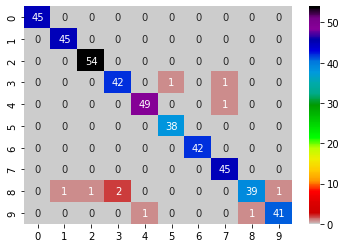

In [192]:
eixos_conf = sns.heatmap(confusao_df, annot=True, cmap='nipy_spectral_r')

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Um `________` em *Seaborn* exibe valores como cores, geralmente com valores de maior magnitude exibidos como cores mais intensas.

**2. _(V ou F)_** Em um relatório de classificação, a precisão especifica o número total de previsões corretas para uma classe dividido pelo número total de amostras para essa classe. 

**3. _(Discussão)_** Explique a linha índice 3 da matriz de confusão apresentada nesta seção:

```
[ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0]
```

<font color = "808080">R.: 1. heatmap (mapa de calor); 2. V; 3. um valor 3 foi classificado como 5 e um valor 3 foi classificado como 7 e 42 3 foram classificados de forma correta 3 -> 3 </font>

## <font color = "000080">1.9 Validação cruzada</font>

In [193]:
from sklearn.model_selection import KFold

In [194]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### <font color = "000080">Usando o objeto `KFold` com a função `cross_val_score` </font>

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
escores = cross_val_score(estimator=knn,
                          X=digitos.data,
                          y=digitos.target,
                          cv=kfold)

In [197]:
escores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [198]:
print(f'Acurácia média: {escores.mean():.2%}')

Acurácia média: 98.78%


In [199]:
print(f'Desvio padrão (acurácia): {escores.std():.2%}')

Desvio padrão (acurácia): 0.74%


## <font color = "000080">Autoavaliação</font>

**1.  _(V ou F)_** A randomização dos dados, embaralhando-os antes de dividi-los em dobras (*folds*), é particularmente importante se as amostras puderem ser ordenadas ou agrupadas. 

**2. _(V ou F)_** Quando você chama `cross_val_score` para executar a validação cruzada de dobras em k, a função retorna a melhor pontuação produzida ao testar o modelo a cada dobra.

<font color = "808080">R.: 1.V - Sim para ter uma amostragem não homogenia/tendenciosa ; 2. F - Não, acontece a pontuação de cada dobra e retorna a média</font>

## <font color = "000080">1.10 Executando diversos modelos/estimadores</font>

In [200]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [201]:
from sklearn.naive_bayes import GaussianNB


In [202]:
modelos = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
    'LinearSVC': LinearSVC()
  }

In [203]:
for nome_modelo, objeto_modelo in modelos.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    escores = cross_val_score(estimator=objeto_modelo, X=digitos.data,
    y=digitos.target, cv=kfold)
    print(f'{nome_modelo:>20}: ' +
          f'acurácia média = {escores.mean():.2%}; ' +
          f'Desvio padrão = {escores.std():.2%}')

KNeighborsClassifier: acurácia média = 98.78%; Desvio padrão = 0.74%
                 SVC: acurácia média = 98.72%; Desvio padrão = 0.79%
          GaussianNB: acurácia média = 84.48%; Desvio padrão = 3.47%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

           LinearSVC: acurácia média = 95.55%; Desvio padrão = 0.96%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### <font color = "000080">Diagrama de estimadores *Scikit-Learn*</font>


https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## <font color = "000080">Autoavaliação</font>

**1. _(V ou F)_** Você deve escolher o melhor estimador antes de realizar seu estudo de aprendizado de máquina.

**2. _(Discussão)_** Como você modificaria o código nesta seção para também testar um estimador `LinearSVC`?

<font color = "808080">R.: 1. F; from sklearn.svm import LinearSVC
"LinearSVC": lINEARsvc(){}</font>

O algoritmo LinearSVC não consegue Converger: o algoritmo não é adequado para esse problema e o resultado obtido é após seu criterio de parada. Não necessariamente o valor final. O recomendado seria utilizar um novo estimador pois o problema não está bem condicionado.

## <font color = "000080">1.11 Ajustes de hiperparâmetros</font>

In [204]:
for i in range(1, 30, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=i)
    escores = cross_val_score(estimator=knn, X=digitos.data, 
    y=digitos.target, cv=kfold)
    print(f'k = {i:<2}; acurácia média = {escores.mean():.2%}; ' +
          f'desvio padrão = {escores.std():.2%}')


k = 1 ; acurácia média = 98.83%; desvio padrão = 0.58%
k = 3 ; acurácia média = 98.83%; desvio padrão = 0.72%
k = 5 ; acurácia média = 98.78%; desvio padrão = 0.74%
k = 7 ; acurácia média = 98.44%; desvio padrão = 0.96%
k = 9 ; acurácia média = 98.39%; desvio padrão = 0.80%
k = 11; acurácia média = 98.33%; desvio padrão = 0.90%
k = 13; acurácia média = 97.89%; desvio padrão = 0.89%
k = 15; acurácia média = 97.83%; desvio padrão = 0.95%
k = 17; acurácia média = 97.50%; desvio padrão = 1.00%
k = 19; acurácia média = 97.66%; desvio padrão = 0.96%


## <font color = "000080">Autoavaliação</font>

**1. _(V ou F)_** Quando você cria um objeto estimador, os valores padrão do hiperparâmetro que o `scikit-learn` usa são geralmente os melhores para todos os estudos de aprendizado de máquina.

<font color = "808080">R.: F - é bom estimar os hiperparâmetro atráves de estrategias supervisionadas.</font>

### <font color = "000080">Referências</font>

DEITEL, P. e DEITEL, H., Intro to Python for computer science and data science. Pearson, 2020.

In [ ]:
# Adaptado de:
#
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################